# Tesla Deaths Exploratory Data Analysis

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Tesla Deaths/tesla.csv')

In [3]:
sns.set_theme(style='whitegrid',palette='mako' )

In [4]:
df.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,TSLA+cycl / peds,Model,AutoPilot claimed,Verified Tesla Autopilot Death,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,254,2022,8/16/2022,Germany,NaN,"Tesla car crashes into tree, burns",2,NaN,NaN,-,...,2,NaN,-,-,https://www.tag24.de/nachrichten/unfall/tesla...,NaN,NaN,NaN,NaN,NaN
1,253,2022,8/15/2022,USA,CA,Tesla veers into oncoming traffic,4,1,3,-,...,4,NaN,-,-,https://www.ksbw.com/article/hollister-crash-...,NaN,NaN,NaN,NaN,NaN
2,252,2022,8/14/2022,Finland,NaN,Unlicensed driver hits pedestrian,1,-,-,-,...,1,NaN,-,-,https://yle.fi/uutiset/3-12576787,NaN,NaN,NaN,NaN,NaN
3,251,2022,8/2/2022,USA,FL,Man in wheelchair hit crossing road,1,-,-,-,...,1,3,-,-,https://www.wfla.com/news/man-in-wheelchair-f...,NaN,NaN,NaN,NaN,NaN
4,250,2022,7/27/2022,USA,ME,Tesla crashes at high speed,1,1,-,-,...,1,-,-,-,https://www.boothbayregister.com/article/sout...,NaN,James T. Penner,NaN,NaN,NaN


In [5]:
df.columns

Index(['Case #', 'Year', 'Date', ' Country ', ' State ', ' Description ',
       ' Deaths ', ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' AutoPilot claimed ', ' Verified Tesla Autopilot Death ', ' Source ',
       ' Note ', ' Deceased 1 ', ' Deceased 2 ', ' Deceased 3 ',
       ' Deceased 4 '],
      dtype='object')

In [6]:
df.columns = df.columns.str.strip() 

In [7]:
df_date = df.groupby(by='Year').sum().reset_index()

## Years

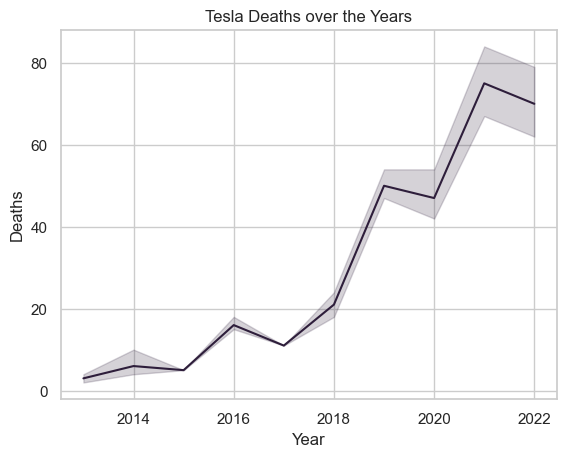

In [10]:
sns.lineplot(data=df, x='Year', y='Deaths', estimator='sum').set(title='Tesla Deaths over the Years', );


In [170]:
df['Date']=pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [178]:
df['Day']=df['Date'].dt.strftime('%d')
df['Week']= df['Date'].dt.strftime('%A')
df['Month']=df['Date'].dt.strftime('%m')

In [171]:
df['Month'] = df['Date'].dt.strftime('%m')

In [179]:
df.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Death,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4,Month,Day,Week
0,254,2022,2022-08-16,Germany,0,"Tesla car crashes into tree, burns",2,0,0,0,...,0,https://www.tag24.de/nachrichten/unfall/tesla...,0,0,0,0,0.0,08,16,Tuesday
1,253,2022,2022-08-15,USA,CA,Tesla veers into oncoming traffic,4,1,3,0,...,0,https://www.ksbw.com/article/hollister-crash-...,0,0,0,0,0.0,08,15,Monday
2,252,2022,2022-08-14,Finland,0,Unlicensed driver hits pedestrian,1,0,0,0,...,0,https://yle.fi/uutiset/3-12576787,0,0,0,0,0.0,08,14,Sunday
3,251,2022,2022-08-02,USA,FL,Man in wheelchair hit crossing road,1,0,0,0,...,0,https://www.wfla.com/news/man-in-wheelchair-f...,0,0,0,0,0.0,08,02,Tuesday
4,250,2022,2022-07-27,USA,ME,Tesla crashes at high speed,1,1,0,0,...,0,https://www.boothbayregister.com/article/sout...,0,James T. Penner,0,0,0.0,07,27,Wednesday


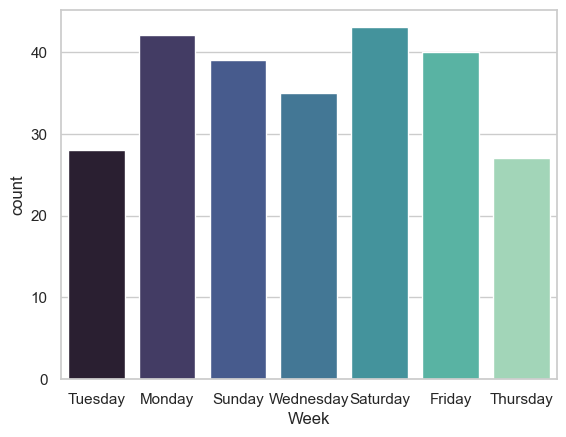

In [182]:
sns.countplot(data=df, x='Week', palette='mako');

In [201]:
df.sort_values('Day', inplace=True)

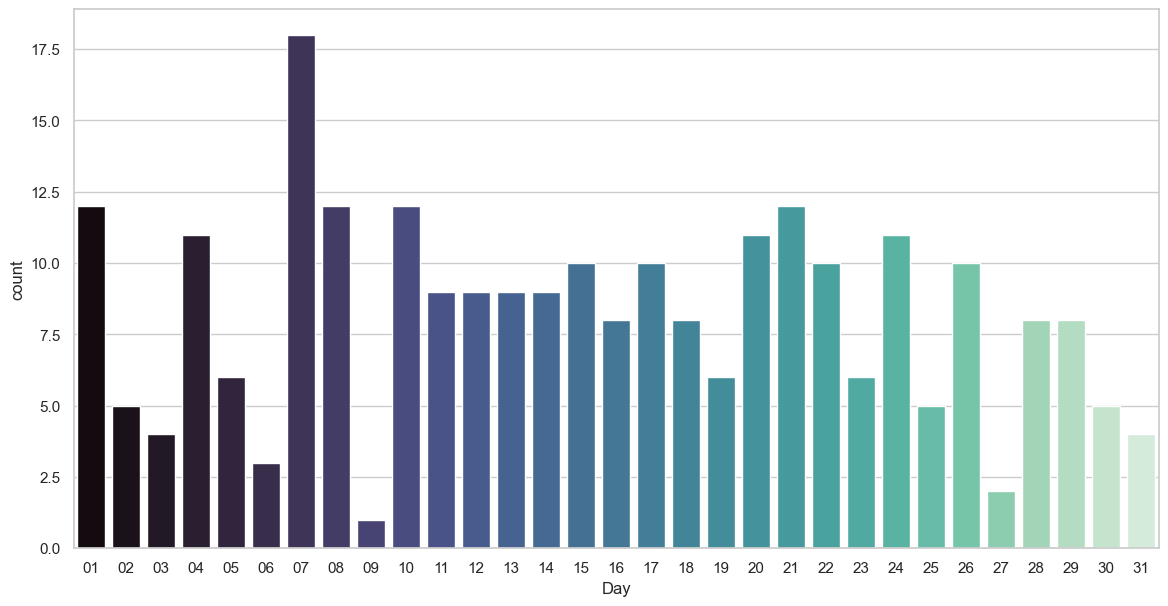

In [203]:
#days
plt.figure(figsize=(14,7))
sns.countplot(data=df, x='Day', palette='mako');

In [207]:
df.sort_values(by='Month', inplace=True)

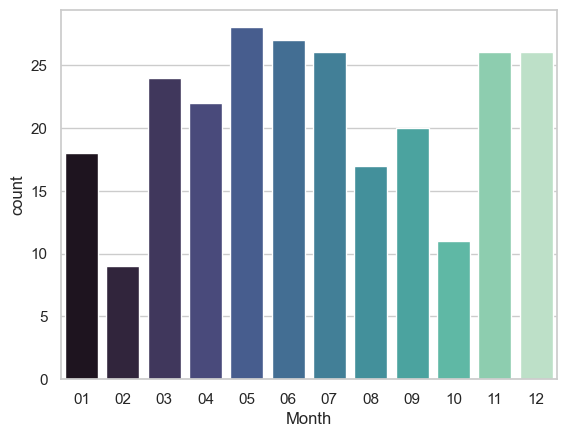

In [208]:
sns.countplot(data=df, x='Month', palette='mako');

## Country

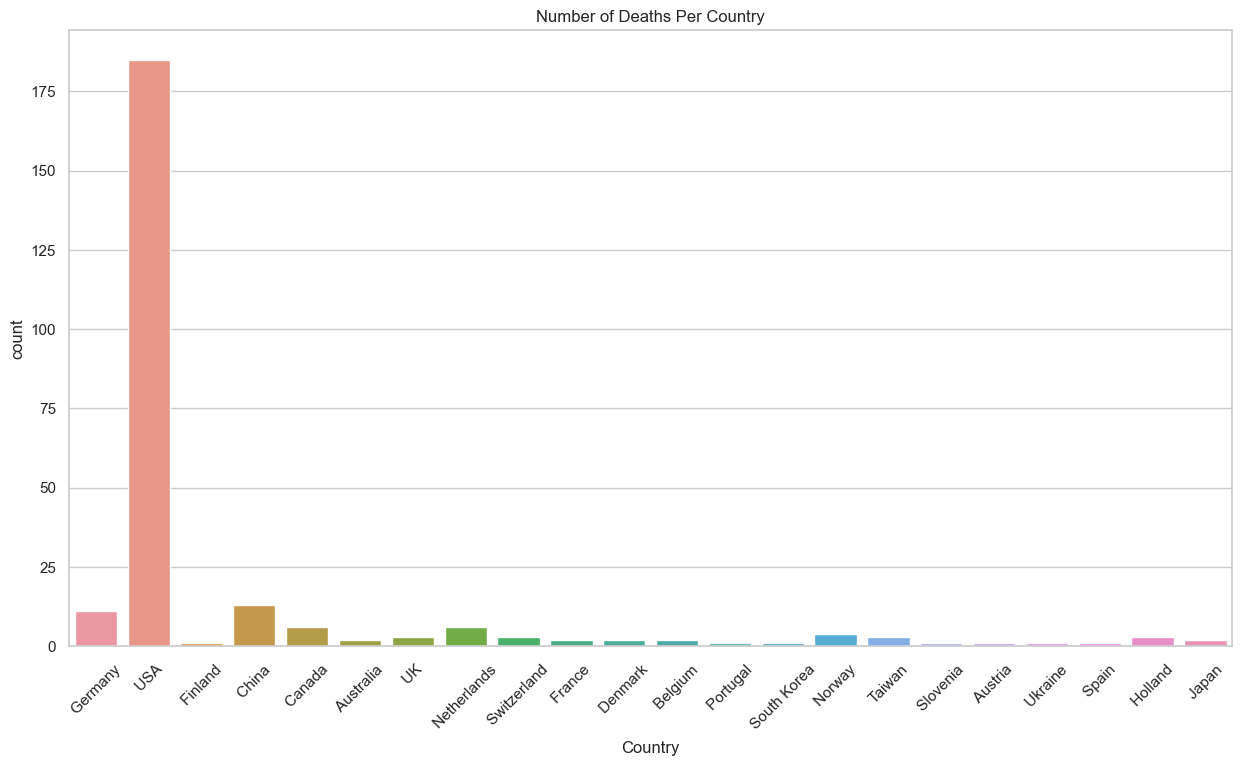

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='Country').set(title='Number of Deaths Per Country');
plt.xticks(rotation=45)

plt.show()

In [13]:
df['Country'].value_counts()

 USA             185
 China            13
 Germany          11
 Canada            6
 Netherlands       6
 Norway            4
 Holland           3
 Taiwan            3
 UK                3
 Switzerland       3
 Belgium           2
 Denmark           2
 France            2
 Australia         2
 Japan             2
 Portugal          1
 South Korea       1
 Slovenia          1
 Austria           1
 Ukraine           1
 Spain             1
 Finland           1
Name: Country, dtype: int64

### Looking at the USA

In [14]:
usa = df[df['Country'] == ' USA ']
germany = df[df['Country'] == ' Germany ']


In [23]:
usa_state = usa.groupby(by='State').sum()

In [25]:
usa_state.reset_index(inplace=True)

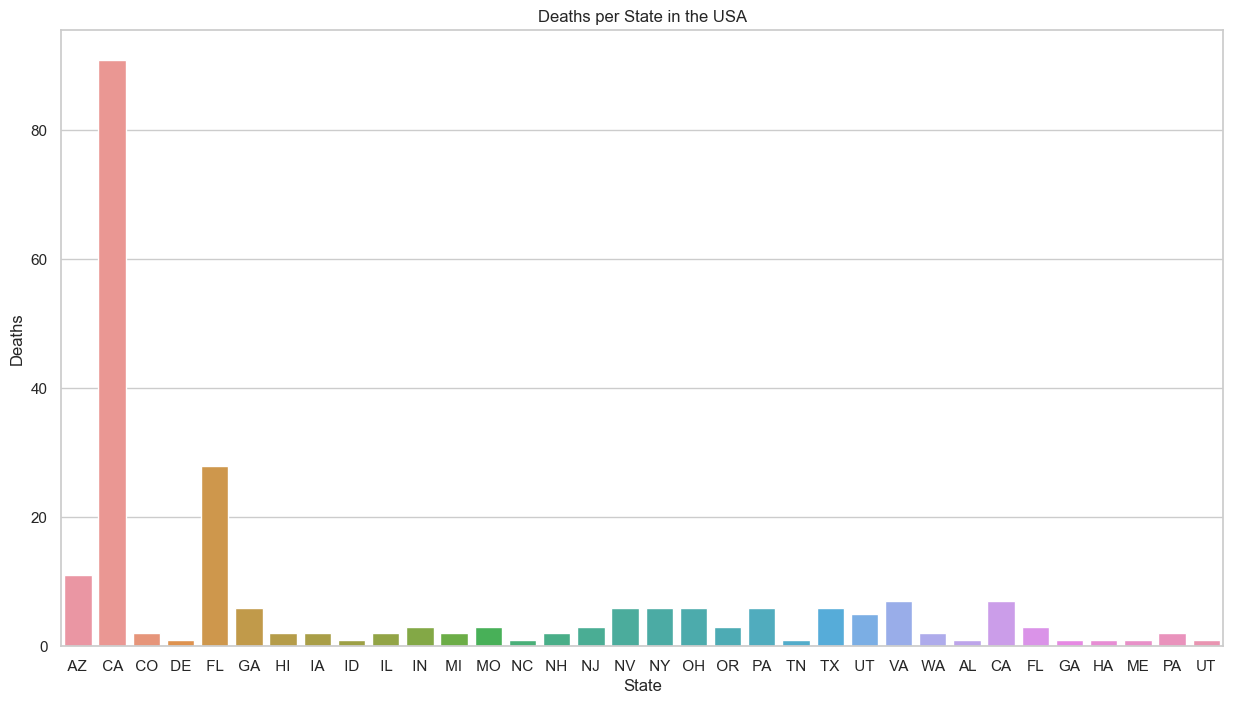

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(data=usa_state, x='State', y='Deaths').set(title='Deaths per State in the USA')

plt.show()

In [ ]:
# of these deaths how many are tesla drivers,     tesla occupants


## Driver vs Occupant

In [29]:
df['Tesla driver'].value_counts()

 -     151
1       99
Name: Tesla driver, dtype: int64

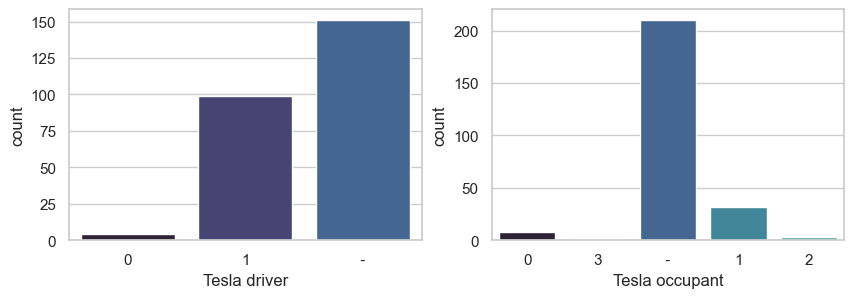

In [84]:
f, axes = plt.subplots(1, 2, figsize=(10,3))
sns.countplot(data=df, x='Tesla driver' , ax=axes[0]);
sns.countplot(data=df, x="Tesla occupant", ax=axes[1]);


In [121]:
# df.replace(' - ', 0, inplace=True)

In [122]:
#deaths groupedby country
grouped_country = df.groupby(by=['Country']).sum().reset_index()

## Model

In [ ]:
# model of the car

In [31]:
model = df.groupby(by='Model').sum()

In [123]:
model.reset_index(inplace=True)
model

,index,Model,Case #,Year,Deaths,Deceased 4
0,0,-,20826,296937,174,0.0
1,1,S,3591,90837,54,0.0
2,2,X,1687,34328,19,0.0
3,3,Y,1263,14146,9,0.0
4,4,3,4259,70698,41,0.0


<AxesSubplot:xlabel='Model', ylabel='Deaths'>

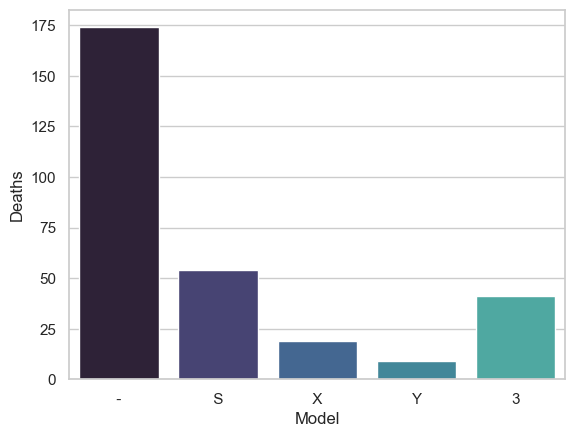

In [124]:
sns.barplot(data=model, x='Model', y='Deaths')

In [133]:
models_country =df.groupby(by=['Country', 'Model']).sum().reset_index()

In [168]:
models_country.head(10)

,Country,Model,Case #,Year,Deaths,Deceased 4
0,Australia,0,36,2017,1,0.0
1,Australia,X,222,2022,1,0.0
2,Austria,3,91,2019,1,0.0
3,Belgium,0,149,2021,1,0.0
4,Belgium,3,133,2020,1,0.0
5,Canada,0,369,6057,3,0.0
6,Canada,S,50,2018,1,0.0
7,Canada,X,61,2019,1,0.0
8,Canada,3,109,2020,3,0.0
9,China,0,1515,18188,9,0.0


In [137]:
models_usa = models_country[models_country['Country']==' USA ']

In [138]:
models_usa

,Country,Model,Case #,Year,Deaths,Deceased 4
39,USA,0,16562,232298,143,0.0
40,USA,S,2557,62575,40,0.0
41,USA,X,748,16152,8,0.0
42,USA,Y,1016,12124,7,0.0
43,USA,3,3089,50499,27,0.0


In [159]:
models_china = models_country[models_country['Country']==' China ']

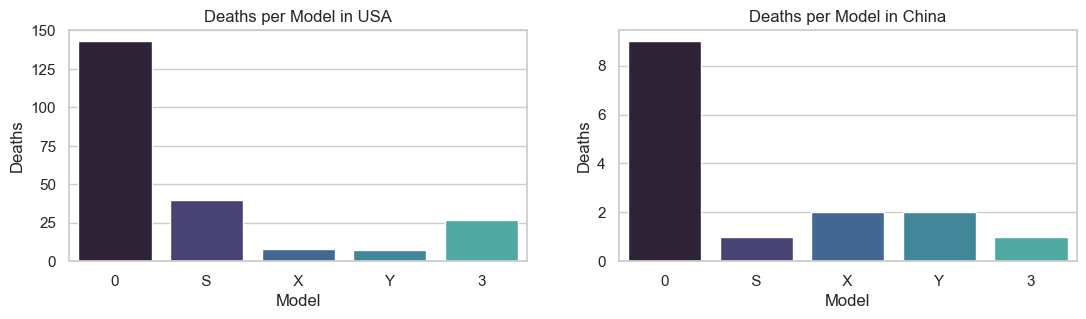

In [163]:
f, axes = plt.subplots(1, 2, figsize=(13,3))

sns.barplot(data=models_usa, x='Model', y='Deaths', ax=axes[0]).set(title='Deaths per Model in USA');
sns.barplot(data=models_china, x='Model', y='Deaths' ,ax=axes[1]).set(title='Deaths per Model in China');

### Models by area???

## Pedestrian, Cylists

In [34]:
# hits pedestiran

In [109]:
df['Description'].str.contains('pedestrian').sum()

18

In [110]:
#most common words
pd.Series(' '.join(df['Description']).lower().split()).value_counts()[:50]

tesla           181
into             69
crashes          40
car              40
driver           32
hits             30
and              29
kills            26
in               23
collision        22
strikes          22
pedestrian       21
on               19
crash            16
fire             15
hit              13
motorcyclist     13
ends             12
rear             12
drives           12
dies             12
a                11
runs             11
off              11
with             10
loses            10
tree             10
control           9
later             9
oncoming          9
traffic           9
other             8
highway           8
burns             8
catches           8
tesla,            8
dui               8
tree,             7
involving         7
vehicle           7
at                7
of                6
wrong             6
ignites           6
truck             6
by                6
pole,             6
head-on           6
goes              6
lane              6


## Autopilot

In [ ]:
#Vehicle features analysis: Study the features of Tesla vehicles involved in accidents, such as Autopilot usage, to see if certain features are associated with an increased risk of accidents.

In [111]:
df['Verified Tesla Autopilot Death'].value_counts()

 -     240
1       13
2        1
Name: Verified Tesla Autopilot Death, dtype: int64

<AxesSubplot:xlabel='Verified Tesla Autopilot Death', ylabel='count'>

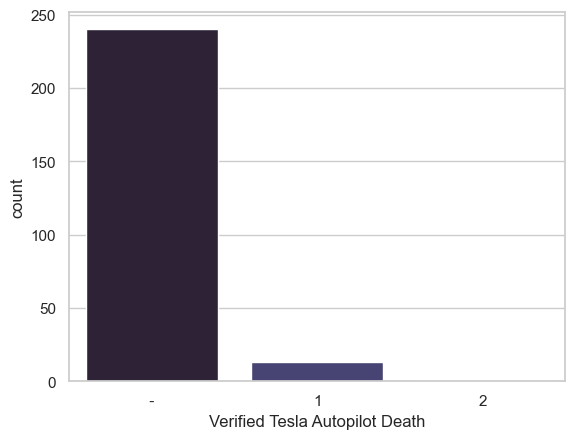

In [112]:
sns.countplot(data=df, x='Verified Tesla Autopilot Death')

In [113]:
#Survival rate analysis: Analyze the survival rate of individuals involved in Tesla car accidents to see if 

In [114]:
deaths_total = df['Deaths'].sum()

In [115]:
death_rate = deaths_total / len(df) 
death_rate

1.1968503937007875

## Cyclists, Pedestrians

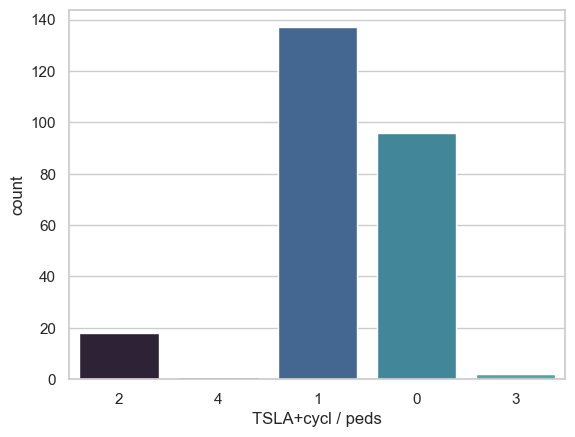

In [125]:
sns.countplot(data=df, x='TSLA+cycl / peds');

<AxesSubplot:xlabel='Cyclists/ Peds', ylabel='count'>

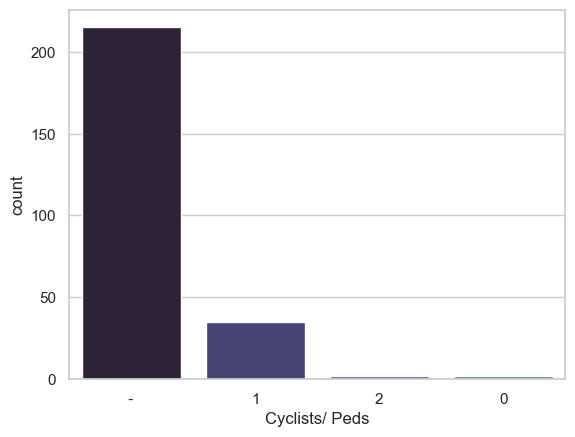

In [117]:
sns.countplot(data=df, x='Cyclists/ Peds')

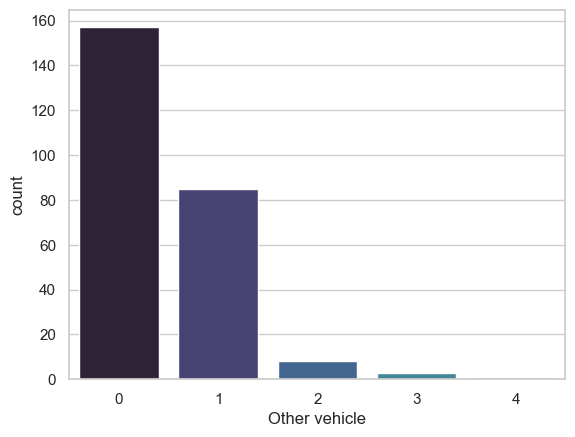

In [126]:
sns.countplot(data=df, x='Other vehicle');

In [120]:
# Additionally consider using descriptive analytics such as means and medians to determine if certain models are more prone to accidents than others compared against one another;


In [ ]:
#while also exploring if Autopilot feature usage has any correlation to higher rates/ numbers involving fatalities .
#need to clean the columns??

## Stuff to go further

In [ ]:
# Driver behavior analysis: Study the behavior of drivers involved in Tesla car deaths, such as speed, distraction, and impairment, to identify areas for improvement in driver education and training.

In [ ]:
#Comparison with other vehicles: Compare the frequency of Tesla car deaths with other vehicles on the market to see how Tesla compares in terms of safety

#Tesla's safety features are effective in reducing fatalities. COMPARED TO OTHER CARS -- do laterr.